In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from timeit import default_timer as timer

In [110]:
# get the data
df_damri = pd.read_csv("../data/damri_apps_preprocessed.csv")
df_damri['cleaned_text'].fillna('', inplace=True)
df_damri.head()



,content,cleaned_text,tokenized_raw_text,tokenized_preprocessed_text,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gabisa beli tiket jir,gabisa beli tiket jir,"['gabisa', 'beli', 'tiket', 'jir']","['gabisa', 'beli', 'tiket', 'jir']",1,0,4.5.2,2025-09-04 11:13:20,NaN,NaN
1,"good banget,simple dengan pemesanan tiket via ...",good bangetsimple mesan tiket via aplikasi adm...,"['good', 'bangetsimple', 'dengan', 'pemesanan'...","['good', 'bangetsimple', 'mesan', 'tiket', 'vi...",5,0,4.5.2,2025-09-03 06:31:04,NaN,NaN
2,mau ngecek ongkir kirim paket ga tersedia.. pa...,mau ngecek ongkir kirim paket tidak sedia pada...,"['mau', 'ngecek', 'ongkir', 'kirim', 'paket', ...","['mau', 'ngecek', 'ongkir', 'kirim', 'paket', ...",1,0,4.5.2,2025-09-02 17:06:03,NaN,NaN
3,nyaman banget naik bus damri dari jagakarsa ke...,nyaman banget naik bus damri jagakarsa airport...,"['nyaman', 'banget', 'naik', 'bus', 'damri', '...","['nyaman', 'banget', 'naik', 'bus', 'damri', '...",5,0,4.5.1,2025-09-02 07:13:14,NaN,NaN
4,ini kenapa nik saya gk bisa buat daftar,kenapa nik tidak buat daftar,"['ini', 'kenapa', 'nik', 'saya', 'gk', 'bisa',...","['kenapa', 'nik', 'tidak', 'buat', 'daftar']",3,0,NaN,2025-08-31 07:00:03,NaN,NaN


In [111]:
# get sentiment
df_damri['sentiment'] = df_damri['score'].apply(lambda x : 1 if x >= 4 else 0)
df_damri.head()

,content,cleaned_text,tokenized_raw_text,tokenized_preprocessed_text,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sentiment
0,gabisa beli tiket jir,gabisa beli tiket jir,"['gabisa', 'beli', 'tiket', 'jir']","['gabisa', 'beli', 'tiket', 'jir']",1,0,4.5.2,2025-09-04 11:13:20,NaN,NaN,0
1,"good banget,simple dengan pemesanan tiket via ...",good bangetsimple mesan tiket via aplikasi adm...,"['good', 'bangetsimple', 'dengan', 'pemesanan'...","['good', 'bangetsimple', 'mesan', 'tiket', 'vi...",5,0,4.5.2,2025-09-03 06:31:04,NaN,NaN,1
2,mau ngecek ongkir kirim paket ga tersedia.. pa...,mau ngecek ongkir kirim paket tidak sedia pada...,"['mau', 'ngecek', 'ongkir', 'kirim', 'paket', ...","['mau', 'ngecek', 'ongkir', 'kirim', 'paket', ...",1,0,4.5.2,2025-09-02 17:06:03,NaN,NaN,0
3,nyaman banget naik bus damri dari jagakarsa ke...,nyaman banget naik bus damri jagakarsa airport...,"['nyaman', 'banget', 'naik', 'bus', 'damri', '...","['nyaman', 'banget', 'naik', 'bus', 'damri', '...",5,0,4.5.1,2025-09-02 07:13:14,NaN,NaN,1
4,ini kenapa nik saya gk bisa buat daftar,kenapa nik tidak buat daftar,"['ini', 'kenapa', 'nik', 'saya', 'gk', 'bisa',...","['kenapa', 'nik', 'tidak', 'buat', 'daftar']",3,0,NaN,2025-08-31 07:00:03,NaN,NaN,0


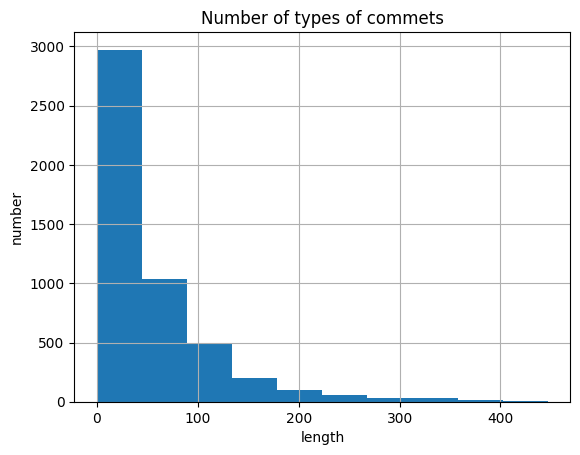

count    4934.000000
mean       53.778071
std        61.458092
min         0.000000
25%        12.000000
50%        33.000000
75%        72.000000
max       447.000000
dtype: float64


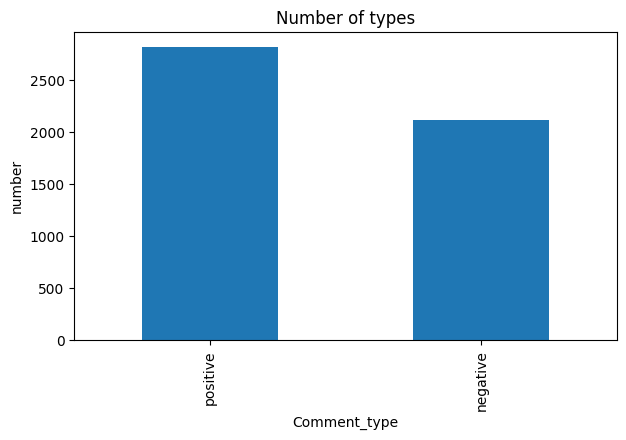

In [112]:
# Simple EDA
class EDA():
    def get_length_dist(self,data):
        rev_len = [len(i) for i in data]
        pd.Series(rev_len).hist()
        plt.title('Number of types of commets')
        plt.xlabel('length')
        plt.ylabel('number')
        plt.show()
        print(pd.Series(rev_len).describe())
    def get_class_dist(self,df):
        df['sentiment'].replace({1:'positive',0:'negative'}).value_counts().plot(kind='bar',figsize=(7,4))
        plt.title('Number of types')
        plt.xlabel('Comment_type')
        plt.ylabel('number')
        plt.show()

eda = EDA()
eda.get_length_dist(df_damri['cleaned_text'])
eda.get_class_dist(df_damri)

### Split the data

In [113]:
x = df_damri['cleaned_text']
Y = df_damri['sentiment']

In [114]:
xtrain, xtest, ytrain, ytest = train_test_split(x, Y, test_size=0.2, random_state=42)

### Display words count

In [138]:

from collections import Counter
word_counts = Counter(' '.join(xtrain).split())
vocab = [word for word, count in word_counts.most_common()]
vocab[0:10]

['tidak',
 'aplikasi',
 'damri',
 'tiket',
 'sangat',
 'bantu',
 'mudah',
 'baik',
 'mau',
 'bagus']

### TF-IDF Vectorization

In [116]:
batch_size = 1000

In [117]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [118]:
start = timer()
X_train_tfidf = tfidf_vectorizer.fit_transform(xtrain)
X_test_tfidf = tfidf_vectorizer.transform(xtest)
print("TF-IDF Vectorization Time:", timer() - start)

TF-IDF Vectorization Time: 0.058614345001842594


In [119]:
# Vectorize train data
start = timer()
tfidf_vectorizer_xtrain = []
for i in range(0, len(xtrain), batch_size):
    batch_X_train = xtrain[i:i + batch_size]
    batch_X_train_tfidf = tfidf_vectorizer.fit_transform(batch_X_train)
    tfidf_vectorizer_xtrain.extend(batch_X_train_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', timer() - start)

Required time for embedding TFIDF with train data:-  0.07170298300115974


In [120]:
# Vectorize test data
start = timer()
tfidf_vectorizer_xtest = []
for i in range(0, len(xtest), batch_size):
    batch_X_test = xtest[i:i + batch_size]
    batch_X_test_tfidf = tfidf_vectorizer.transform(batch_X_test)
    tfidf_vectorizer_xtest.extend(batch_X_test_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', timer() - start)

Required time for embedding TFIDF with train data:-  0.014843761000520317


In [121]:
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1 Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return acc

### Linear SVM Classification

In [122]:
svm_classifier = LinearSVC()

In [123]:
start = timer()
svm_tfidf = svm_classifier.fit(X_train_tfidf, ytrain)
print('Required time for training Linear SVM classifiers:- ', timer() - start)

Required time for training Linear SVM classifiers:-  0.008074040000792593


In [124]:
acc_svm = evaluate_model(svm_tfidf, X_test_tfidf, ytest, "Linear SVM")


Linear SVM Results:
Accuracy: 0.8906 | Precision: 0.8991 | Recall: 0.9088 | F1 Score: 0.9039
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       428
           1       0.90      0.91      0.90       559

    accuracy                           0.89       987
   macro avg       0.89      0.89      0.89       987
weighted avg       0.89      0.89      0.89       987



### Logistic Regression Classification

In [125]:
lr_classifier = LogisticRegression(max_iter=1000)

In [126]:
start = timer()
lr_tfidf = lr_classifier.fit(X_train_tfidf, ytrain)
print('Required time for training Logistic Regression classifiers:- ', timer() - start)

Required time for training Logistic Regression classifiers:-  0.03393552299894509


In [127]:
acc_lr = evaluate_model(lr_tfidf, X_test_tfidf, ytest, "Logistic Regression")


Logistic Regression Results:
Accuracy: 0.8967 | Precision: 0.9073 | Recall: 0.9106 | F1 Score: 0.9089
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       428
           1       0.91      0.91      0.91       559

    accuracy                           0.90       987
   macro avg       0.89      0.89      0.89       987
weighted avg       0.90      0.90      0.90       987



### Multinomial Naive Bayes Classification

In [128]:
mnb_classifier = MultinomialNB()

In [129]:
start = timer()
mnb_tfidf = mnb_classifier.fit(X_train_tfidf, ytrain)
print('Required time for training Multinomial Naive bayes classifiers:- ', timer() - start)

Required time for training Multinomial Naive bayes classifiers:-  0.002368099998420803


In [130]:
acc_mnb = evaluate_model(mnb_tfidf, X_test_tfidf, ytest, "Multinomial Naive Bayes")


Multinomial Naive Bayes Results:
Accuracy: 0.9068 | Precision: 0.9238 | Recall: 0.9106 | F1 Score: 0.9171
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       428
           1       0.92      0.91      0.92       559

    accuracy                           0.91       987
   macro avg       0.90      0.91      0.91       987
weighted avg       0.91      0.91      0.91       987



### XGBoost Classification

In [131]:
xgb_classifier = XGBClassifier(eval_metric='logloss')

In [132]:
start = timer()
xgb_tfidf = xgb_classifier.fit(X_train_tfidf, ytrain)
print('Required time for training XGBoost classifiers:- ', timer() - start)

Required time for training XGBoost classifiers:-  0.8898418250028044


In [133]:
acc_xgb = evaluate_model(xgb_tfidf, X_test_tfidf, ytest, "XGBoost")


XGBoost Results:
Accuracy: 0.8652 | Precision: 0.8660 | Recall: 0.9016 | F1 Score: 0.8834
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       428
           1       0.87      0.90      0.88       559

    accuracy                           0.87       987
   macro avg       0.87      0.86      0.86       987
weighted avg       0.87      0.87      0.86       987



### Random Forest Classification

In [134]:
rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=35, max_features='sqrt', min_samples_leaf=4, bootstrap=True, n_jobs=-1)

In [135]:
start = timer()
rf_tfidf = rf_classifier.fit(X_train_tfidf, ytrain)
print('Required time for training Random Forest classifiers:- ', timer() - start)

Required time for training Random Forest classifiers:-  0.39029318499888177


In [136]:
acc_rf = evaluate_model(rf_tfidf, X_test_tfidf, ytest, "Random Forest")


Random Forest Results:
Accuracy: 0.8501 | Precision: 0.8386 | Recall: 0.9106 | F1 Score: 0.8731
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       428
           1       0.84      0.91      0.87       559

    accuracy                           0.85       987
   macro avg       0.85      0.84      0.84       987
weighted avg       0.85      0.85      0.85       987



### Model Comparison

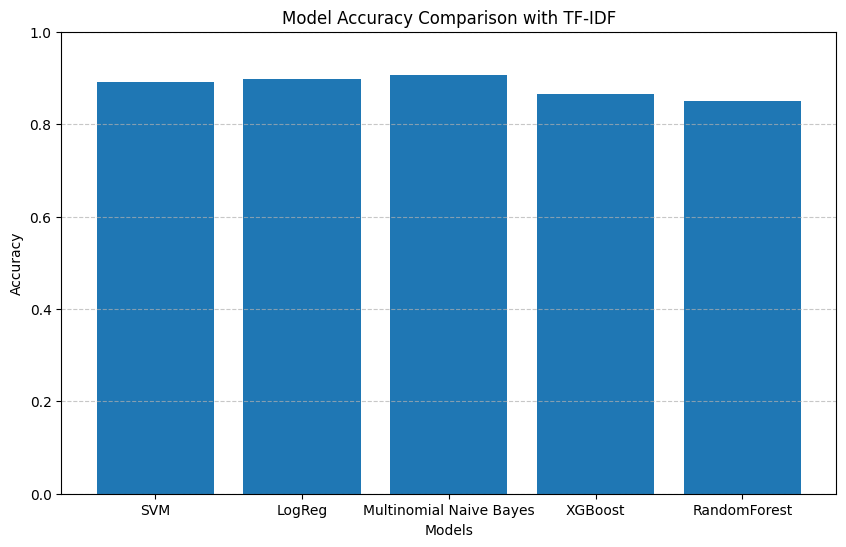

In [137]:
model_names = ['SVM', 'LogReg', 'Multinomial Naive Bayes', 'XGBoost', 'RandomForest']
accuracies = [acc_svm, acc_lr, acc_mnb, acc_xgb, acc_rf]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison with TF-IDF")
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()